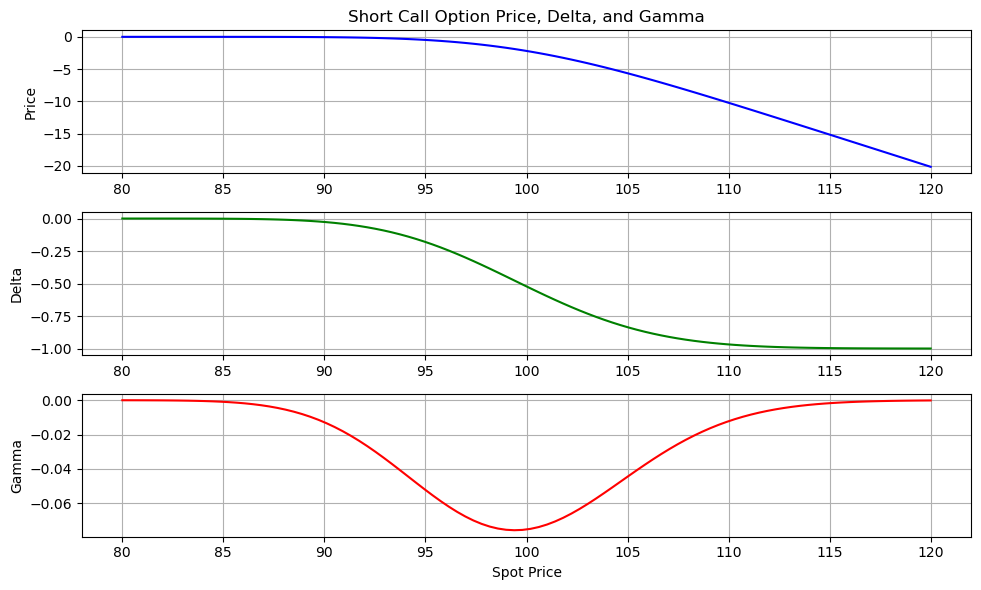

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function for calculating d1 and d2 for Black-Scholes
def calculate_d1_d2(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Black-Scholes price for a short call option
def short_call_price(S, K, r, sigma, T):
    d1, d2 = calculate_d1_d2(S, K, r, sigma, T)
    return -(S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))  # Negative for short

# Delta of a short call option
def short_call_delta(S, K, r, sigma, T):
    d1, _ = calculate_d1_d2(S, K, r, sigma, T)
    return -norm.cdf(d1)  # Negative delta for short

# Gamma remains unchanged (same for calls and puts)
def option_gamma(S, K, r, sigma, T):
    d1, _ = calculate_d1_d2(S, K, r, sigma, T)
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Parameters
K = 100  # Strike price
T = 28 / 252  # Time to maturity in years
sigma = 0.01 * np.sqrt(252)  # Annualized volatility (daily volatility to yearly)
r = 0.02 / 365 * 252  # Annualized interest rate
S = np.linspace(80, 120, 100)  # Range of spot prices

# Calculations
prices = [short_call_price(s, K, r, sigma, T) for s in S]
deltas = [short_call_delta(s, K, r, sigma, T) for s in S]
gammas = [-option_gamma(s, K, r, sigma, T) for s in S]

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(S, prices, label="Price", color='blue')
plt.title('Short Call Option Price, Delta, and Gamma')
plt.ylabel('Price')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(S, deltas, label="Delta", color='green')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(S, gammas, label="Gamma", color='red')
plt.xlabel('Spot Price')
plt.ylabel('Gamma')
plt.grid(True)

plt.tight_layout()
plt.show()

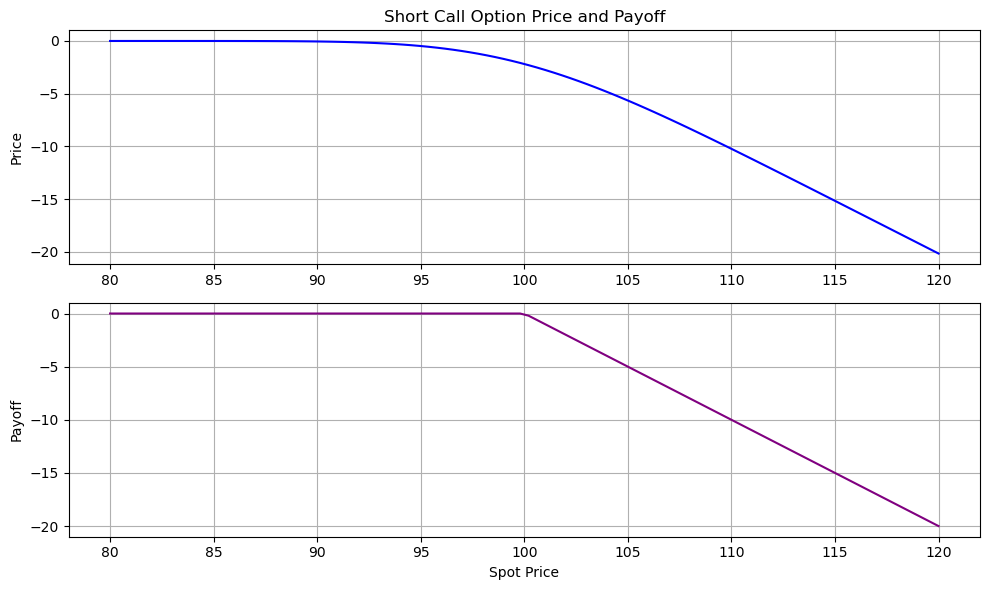

In [22]:
# Payoff of a short call option at expiration
def short_call_payoff(S, K):
    return np.minimum(K - S, 0)  # Payoff is negative for short



# Calculations
prices = [short_call_price(s, K, r, sigma, T) for s in S]
payoffs = [short_call_payoff(s, K) for s in S]

# Plotting
plt.figure(figsize=(10, 6))

# Price plot
plt.subplot(2, 1, 1)
plt.plot(S, prices, label="Option Price", color='blue')
plt.title('Short Call Option Price and Payoff')
plt.ylabel('Price')
plt.grid(True)

# Payoff plot
plt.subplot(2, 1, 2)
plt.plot(S, payoffs, label="Payoff", color='purple')
plt.xlabel('Spot Price')
plt.ylabel('Payoff')
plt.grid(True)

plt.tight_layout()
plt.show()

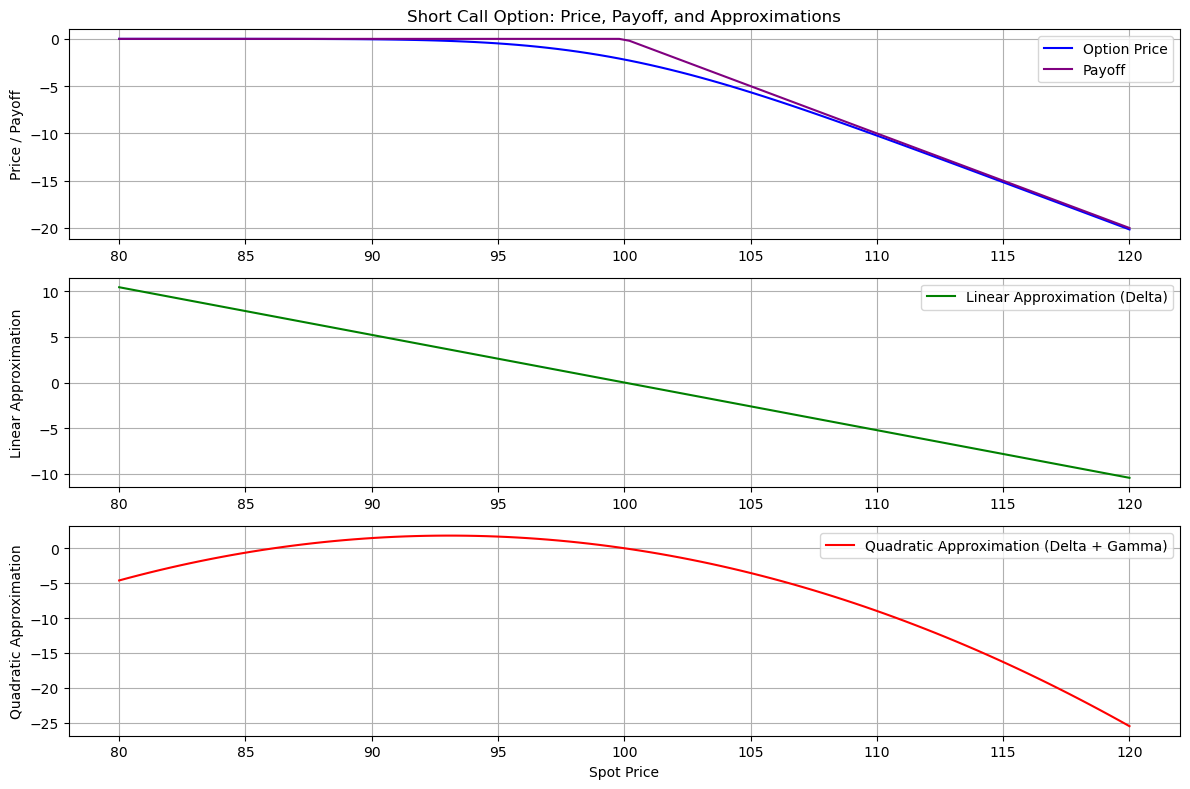

In [23]:
def short_call_delta(S, K, r, sigma, T):
    d1, _ = calculate_d1_d2(S, K, r, sigma, T)
    return -norm.cdf(d1)  # Negative delta for short

S0 = 100

# Local delta and gamma at S0
delta_0 = short_call_delta(S0, K, r, sigma, T)
gamma_0 = -option_gamma(S0, K, r, sigma, T)

# Linear and Quadratic Approximations
linear_approx = [delta_0 * (s - S0) for s in S]
quadratic_approx = [delta_0 * (s - S0) + 0.5 * gamma_0 * (s - S0) ** 2 for s in S]

# Plotting
plt.figure(figsize=(12, 8))

# Price and Payoff plot
plt.subplot(3, 1, 1)
plt.plot(S, prices, label="Option Price", color='blue')
plt.plot(S, payoffs, label="Payoff", color='purple')
plt.title('Short Call Option: Price, Payoff, and Approximations')
plt.ylabel('Price / Payoff')
plt.legend()
plt.grid(True)

# Linear Approximation plot
plt.subplot(3, 1, 2)
plt.plot(S, linear_approx, label="Linear Approximation (Delta)", color='green')
plt.ylabel('Linear Approximation')
plt.grid(True)
plt.legend()

# Quadratic Approximation plot
plt.subplot(3, 1, 3)
plt.plot(S, quadratic_approx, label="Quadratic Approximation (Delta + Gamma)", color='red')
plt.xlabel('Spot Price')
plt.ylabel('Quadratic Approximation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
z_99 = norm.ppf(0.99)  # 99% quantile for normal distribution (2.33)
days = 10/252  # Time horizon in days

# VaR using Delta approximation
var_delta = delta_0 * S0 * sigma * np.sqrt(days) * z_99

# VaR using Delta-Gamma approximation
var_delta_gamma = (delta_0 * S0 * sigma * np.sqrt(days) * z_99 +
                   0.5 * gamma_0 * (S0 ** 2) * (sigma ** 2) * days * (z_99 ** 2))

var_delta,var_delta_gamma

print(f"VaR (Delta): {var_delta}")
print(f"VaR (Delta-Gamma): {var_delta_gamma}")


VaR (Delta): -3.840938589445139
VaR (Delta-Gamma): -5.877899328162431


In [29]:
np.random.seed(42)
n_simulations = 10000
returns = np.random.normal(0, sigma * np.sqrt(10/252), n_simulations)
S_simulations = S0 * np.exp(returns)
option_sim_values = [short_call_price(S, K, r, sigma, T) for S in S_simulations]
VaR_mc = np.percentile(option_sim_values, 1)
print(f"Monte Carlo VaR (99%): {VaR_mc}")


Monte Carlo VaR (99%): -7.975155865036461
